<h6 style="background-color:ffffff;font-size:40px;font-family:Courier;color:#045F5F;font-weight:bold;text-align: center; "> Spam 📧 Detection 🍳 </h6>

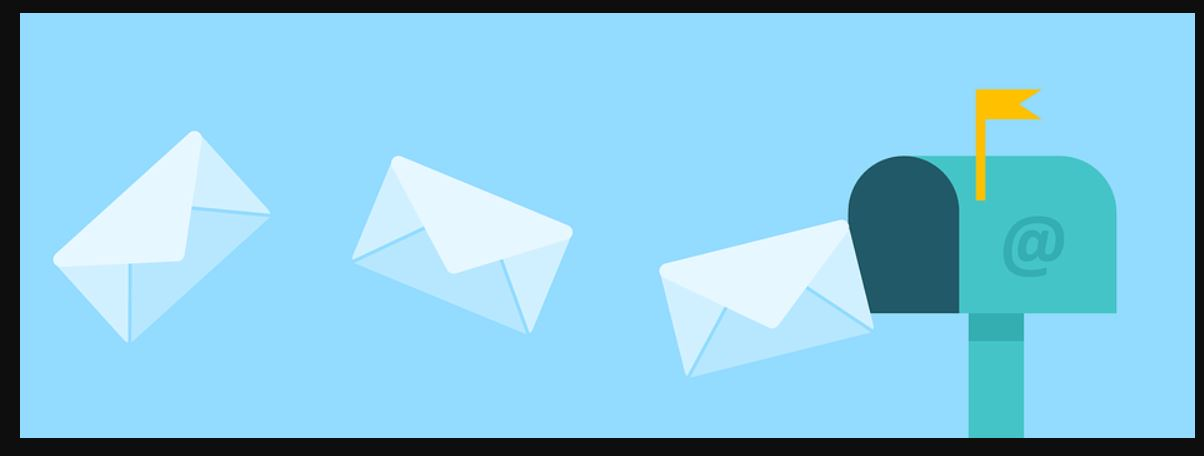<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">Introduction 📚 </h1>
Today's era internet and social media have become fastest way to communication. SMS is easiest way of billion mobile users for sharing information. To have effective communication, spam filtering is one of the important feature.

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">Problem Statement  🎯 </h1>In this notebook , we will explore and understand the process of classifying emails as spam or not spam.

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">1. Import Libraries 📁</h1> Lets import the Python libraries

In [ ]:

import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">2. Load dataset 📁</h1> It contains 5573 rows and 2 columns. Each row represents the message in the text is spam or ham(not spam).

In [ ]:
df=pd.read_csv("../input/sms-spam-collection-dataset/spam.csv",encoding = "latin")

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">3. Exploratory Data Analysis(EDA)🚀</h1>

In [ ]:
# Display top 5 data
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().all()

In [ ]:
df.columns

In [ ]:
df=df.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [ ]:
df

In [ ]:
#rename
df=df.rename({'v1':'Class','v2':'SMS'},axis=1)

In [ ]:
df

In [ ]:
#remove duplicate
df_duplicate=df[df.duplicated()]
df_duplicate

In [ ]:
df.groupby('Class').describe().T

In [ ]:
#Let's make a new column to detect how long the text messages are:
df['length'] = df['SMS'].apply(len)
df.head()

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">📈 4.Data Visualization 📈</h1>

In [ ]:
plt.figure(figsize = (10, 5))
x=df.Class.value_counts()
sns.countplot(x= "Class",data= df)

In [ ]:
#let's check length of SMS
plt.figure(figsize = (10, 5))
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['Class']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['Class']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left"> WordCloud Image ☁️</h1>

In [ ]:
# get all the ham and spam emails
ham_msg = df[df.Class =='ham']
spam_msg = df[df.Class=='spam']

# For ham and spam messages, create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.SMS.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.SMS.to_numpy().tolist())

In [ ]:
# Generate a word cloud image
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


stopwords = set(STOPWORDS)
mask = np.array(Image.open("../input/input-img/email_mask1.png"))


wordcloud_ham = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(ham_msg_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,18])
plt.imshow(wordcloud_ham.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("WordCloud of ham")
plt.axis("off")

# store to file
plt.savefig("ham.png", format="png")

plt.show()

In [ ]:
# Generate a word cloud image
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


stopwords = set(STOPWORDS)
mask = np.array(Image.open("../input/input-img/color_email_mask.png"))


wordcloud_ham = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(spam_msg_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,18])
plt.imshow(wordcloud_ham.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis("off")

# store to file
plt.savefig("spam.png", format="png")
plt.title("WordCloud of spam")
plt.show()

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">5. Data Pre-Processing⚙️</h1>

In [ ]:
from string import punctuation
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
#from gensim.utils import lemmatize
from string import punctuation
import re
from string import punctuation
import nltk
from nltk.stem.porter import *
ps=PorterStemmer()


STOPWORDS=set(stopwords.words('english'))

#Remove Punctuation
def remove_punctuation(word):
    result = ''.join(c for c in word if c not in punctuation)
    return result


#Vectorize the sentance
def tockenize(word):
    result=re.split('\W+',word)
    return result  


#Remove stop words
def remove_stop_words(words):
    result = [c for c in words if c not in STOPWORDS]
    return result    


def stemming(tokenized_row):
    stemmed_text=[ps.stem(char) for char in tokenized_row]
    return stemmed_text

In [ ]:
df['remove_punc']= df['SMS'].apply(remove_punctuation)
df['tokenized_row']=df['remove_punc'].apply(lambda row:tockenize(row.lower()))
df['remove_sword']= df['tokenized_row'].apply(remove_stop_words)
df['stemmed_text']=df['remove_sword'].apply(lambda char :stemming(char))

df[['SMS','stemmed_text']].head()

In [ ]:
def final_text(stemmed_text):
    final_text=" ".join(char for char in stemmed_text)
    return final_text

In [ ]:
df['final_text']=df['stemmed_text'].apply(lambda x:final_text(x))

In [ ]:
df.head()

In [ ]:
df=df.drop(['remove_punc','tokenized_row','remove_sword','stemmed_text'],axis=1)

In [ ]:
df.head()

**Words Frequency**

Can be used to check whether or not there are still words frequantly occur but not meaningful

In [ ]:
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)
    
    return dictionary

dictionary_clean = dictionary(df['final_text'])
dictionary_clean[:20].plot(kind = 'barh',figsize = (10,10))

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">6.Data Modeling ⛏️</h1>

In [ ]:
x=df.drop(['Class'],axis=1)
y=df['Class']

**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**cleaning data**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv=CountVectorizer(max_features=500)
temp_train=cv.fit_transform(x_train['final_text']).toarray()
temp_test=cv.transform(x_test['final_text']).toarray()

In [ ]:
tf=TfidfTransformer()
temp_train=tf.fit_transform(temp_train)
temp_test=tf.transform(temp_test)

In [ ]:
temp_train=pd.DataFrame(temp_train.toarray(),index=x_train.index)
temp_test=pd.DataFrame(temp_test.toarray(),index=x_test.index)
x_train=pd.concat([x_train,temp_train],axis=1,sort=False)
x_test=pd.concat([x_test,temp_test],axis=1,sort=False)

In [ ]:
x_train.head()

In [ ]:
x_train.drop(['SMS','final_text'],axis=1,inplace=True)
x_test.drop(['SMS','final_text'],axis=1,inplace=True)
x_train.head()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy_Score:",accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))

In [ ]:
model.score(x_test,y_test)

**you can visit my notebook [Custom Word Cloud](http://https://www.kaggle.com/tarzon/custom-word-cloud), This notebook explained in detail how to create custom word cloud. You can also download the mask images from [Word cloud mask image](http://https://www.kaggle.com/tarzon/input-img)**

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">If you find it is useful, please give appreciation with an UPVOTE!! 👍  </h1>

<h1 style="background-color:ffffff;font-size:20px;font-family:Courier;color:#045F5F;font-weight : bold;text-align:left">Happy Learnig!!  😊</h1>